In [1]:
import random
import numpy as np
import torch
import utils
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# !pip install gym[atari]
# !pip uninstall ale-py
# !pip install ale-py

In [2]:
from Config.config1_ddqn import config as config1
from Config.config2_ddqn import config as config2
from Config.config3_ddqn import config as config3
from Config.config4_ddqn import config as config4

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

mean_rw_history1 = []
mean_rw_history2 = []
mean_rw_history3 = []
mean_rw_history4 = []

In [4]:
def load1():
    global mean_rw_history1
    checkpoint = torch.load(config1['file_name'] , map_location=torch.device(device))
    mean_rw_history1 = checkpoint['mean_rw_history']

def load2():
    global mean_rw_history2
    checkpoint = torch.load(config2['file_name'] , map_location=torch.device(device))
    mean_rw_history2 = checkpoint['mean_rw_history']

def load3():
    global mean_rw_history3
    checkpoint = torch.load(config3['file_name'] , map_location=torch.device(device))
    mean_rw_history3 = checkpoint['mean_rw_history']

def load4():
    global mean_rw_history4
    checkpoint = torch.load(config4['file_name'] , map_location=torch.device(device))
    mean_rw_history4 = checkpoint['mean_rw_history']

In [5]:
load1()
load2()
load3()
load4()

In [6]:
from scipy.ndimage.filters import gaussian_filter1d


C:\Users\vinik\AppData\Local\Temp\ipykernel_11760\1543485559.py:1: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


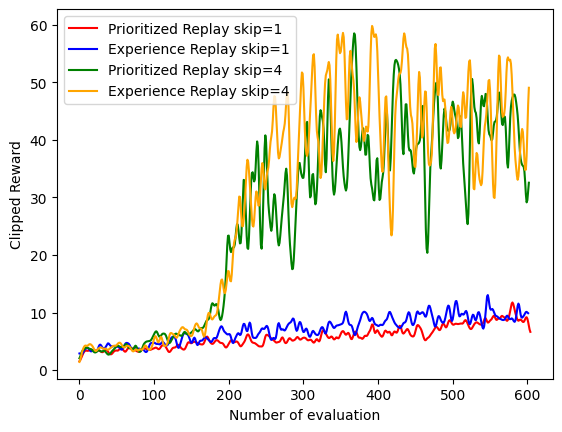

In [7]:
#for smoothing

power1 = gaussian_filter1d(mean_rw_history1, sigma=2)
power2 = gaussian_filter1d(mean_rw_history2, sigma=2)
power3 = gaussian_filter1d(mean_rw_history3, sigma=2)
power4 = gaussian_filter1d(mean_rw_history4, sigma=2)

plt.ylabel
plt.xlabel('Number of evaluation')
plt.ylabel('Clipped Reward')

plt.plot(power1, color='red', label='Prioritized Replay skip=1')
plt.plot(power3, color='blue', label='Experience Replay skip=1')
plt.plot(power4, color='green', label='Prioritized Replay skip=4')
plt.plot(power2, color='orange', label='Experience Replay skip=4')
plt.legend()

plt.show()